In [2]:
import numpy as np
import pandas as pd
import random as rnd

%matplotlib inline
import matplotlib.pyplot as plt

train= pd.read_csv('C:/Users/Kong/Desktop/이지민/AI/병원_개폐업_분류/train.csv')

test= pd.read_csv('C:/Users/Kong/Desktop/이지민/AI/병원_개폐업_분류/test.csv')

##### instkind는 그래프 보려고 매핑했음 -> 밑에 방법 말고 나중에는 그냥 원핫인코딩으로 처리

In [3]:
instkind_mapping = {'nursing_hospital' : 0, 'general_hospital' : 1, 'hospital' : 2,
       'traditional_clinic' : 3, 'clinic' : 4, 'traditional_hospital' : 5,
       'dental_clinic' : 6}

train['instkind'] = train['instkind'].map(instkind_mapping)

### 1. sido = 병원의 광역 지역 정보
---------------------------------------------------------------
* 딱히 얘랑 관련있어 보이는 컬럼은 없는 듯
* null값은 최빈값 넣어주기

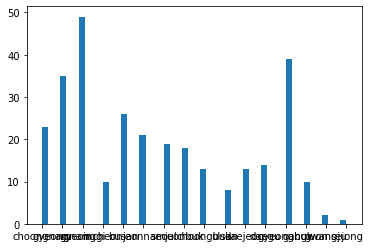

In [2]:
plt.hist(train.sido, bins=50)
plt.show()

### 2. sgg = 병원의 시군구 자료
------------------------------------------------------------------
* null 값 = 최빈값

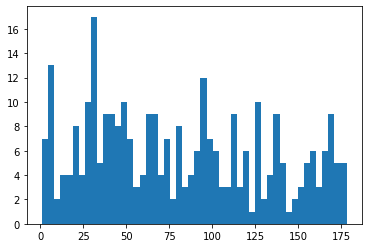

In [3]:
plt.hist(train.sgg, bins=50)
plt.show()

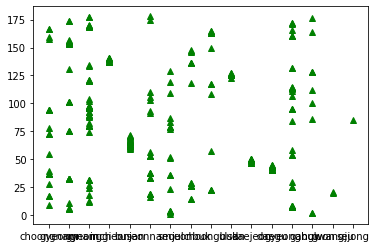

In [40]:
plt.plot(train['sido'], train['sgg'], 'g^')
plt.show()

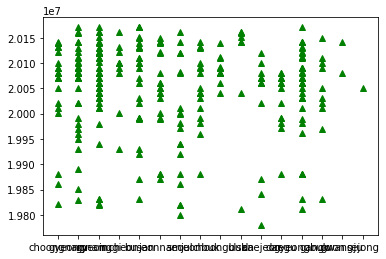

In [41]:
plt.plot(train['sido'], train['openDate'], 'g^')
plt.show()

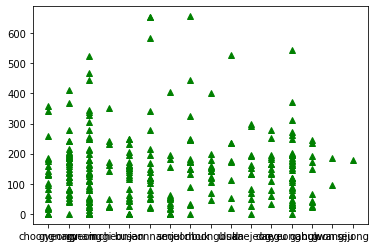

In [42]:
plt.plot(train['sido'], train['bedCount'], 'g^')
plt.show()

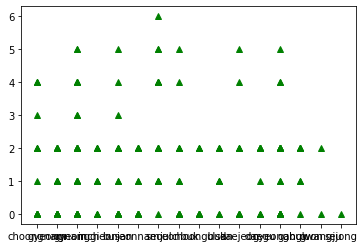

In [4]:
plt.plot(train['sido'], train['instkind'], 'g^')
plt.show()

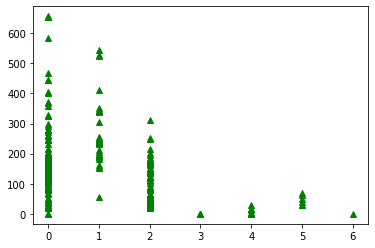

In [5]:
plt.plot(train['instkind'], train['bedCount'], 'g^')
plt.show()

# |||  bedCount의 null값은 instkind별로 그룹화 지어서 그 평균값 넣으면 될 듯  |||
# ||| 반대로 instkind의 null 값은 bedCount를 보고 처리 |||

### 3. openDate = 병원 설립일

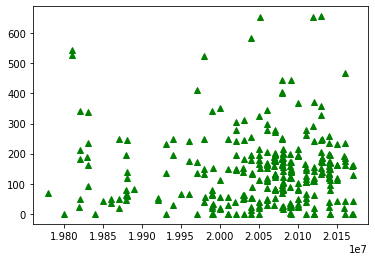

In [6]:
plt.plot(train['openDate'], train['bedCount'], 'g^')
plt.show()

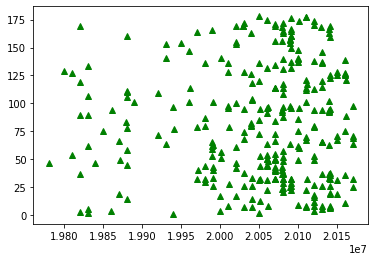

In [8]:
plt.plot(train['openDate'], train['sgg'], 'g^')
plt.show()

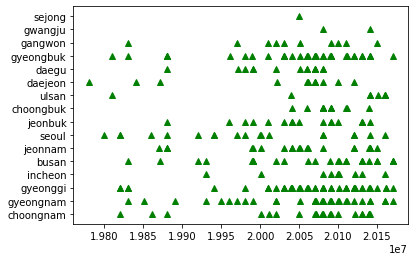

In [9]:
plt.plot(train['openDate'], train['sido'], 'g^')
plt.show()

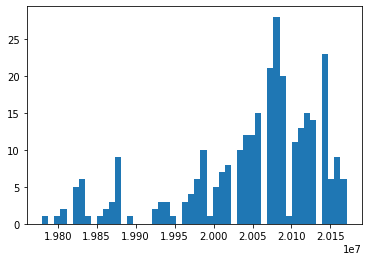

In [4]:
plt.hist(train.openDate, bins=50)
plt.show()

### 4. bedCount = 병원이 갖추고 있는 병상의 수

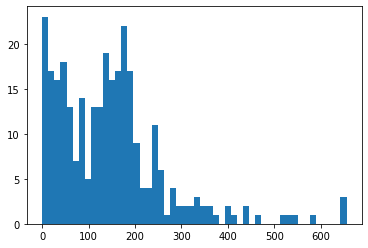

In [5]:
plt.hist(train.bedCount, bins=50)
plt.show()

### 5. instkind = 병원, 의원, 요양병원, 한의원, 종합병원 등 병원의 종류

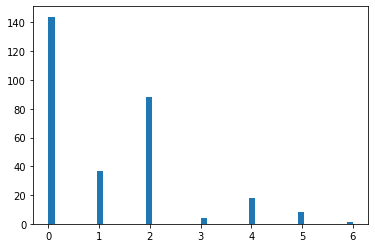

In [19]:
plt.hist(train.instkind, bins=50)
plt.show()

### 6. revenue1 = 매출액, 2017(회계년도)년 데이터를 의미함

# ||| 6~13까지는 [0 ~ 1] 사이로 바꾸고 |||
# ||| 14는 [-1~ 1] 사이로 바꾸면 될 듯 |||
# ||| 이상치는 따로 제거 안하고 표준화/정규화만 |||

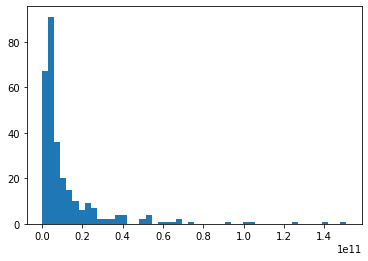

In [7]:
plt.hist(train.revenue1, bins=50)
plt.show()

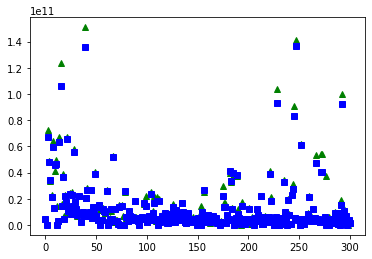

In [11]:
plt.plot(train['revenue1'], 'g^', train['revenue2'], 'bs')
plt.show()

### 7. salescost1 = 매출원가, 2017(회계년도)년 데이터를 의미함

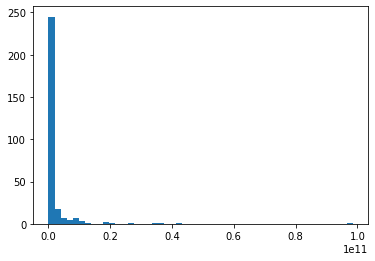

In [8]:
plt.hist(train.salescost1, bins=50)
plt.show()

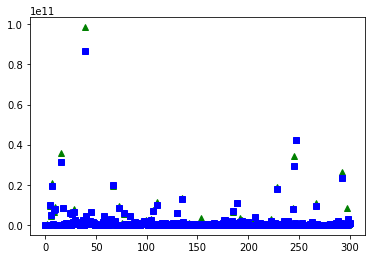

In [12]:
plt.plot(train['salescost1'], 'g^', train['salescost2'], 'bs')
plt.show()

### 8. sga1 = 판매비와 관리비, 2017(회계년도)년 데이터를 의미함

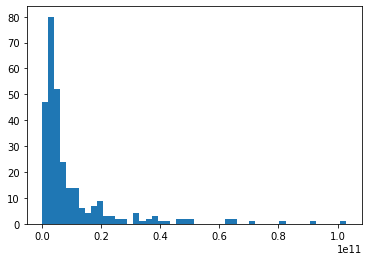

In [9]:
plt.hist(train.sga1, bins=50)
plt.show()

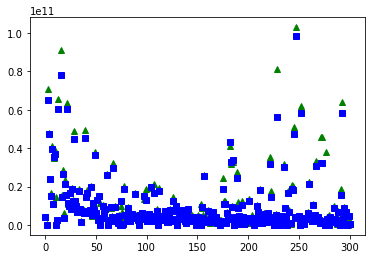

In [14]:
plt.plot(train['sga1'], 'g^', train['sga2'], 'bs')
plt.show()

### 9. salary1 = 급여, 2017(회계년도)년 데이터를 의미함

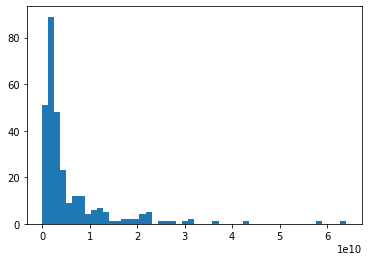

In [10]:
plt.hist(train.salary1, bins=50)
plt.show()

### 10. noi1 = 영업외수익, 2017(회계년도)년 데이터를 의미함

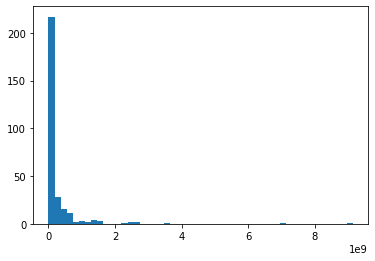

In [11]:
plt.hist(train.noi1, bins=50)
plt.show()

### 11. noe1 = 영업외비용, 2017(회계년도)년 데이터를 의미함

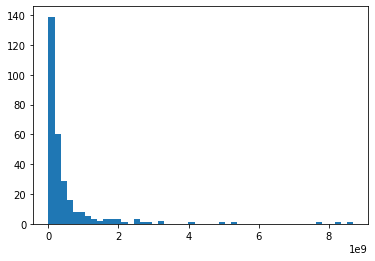

In [12]:
plt.hist(train.noe1, bins=50)
plt.show()

### 12. interest1 = 이자비용, 2017(회계년도)년 데이터를 의미함

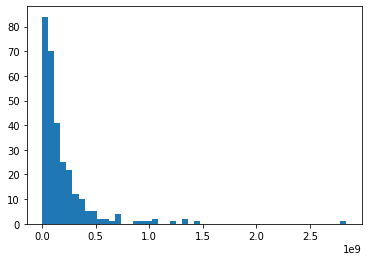

In [13]:
plt.hist(train.interest1, bins=50)
plt.show()

### 13. ctax1 = 법인세비용, 2017(회계년도)년 데이터를 의미함

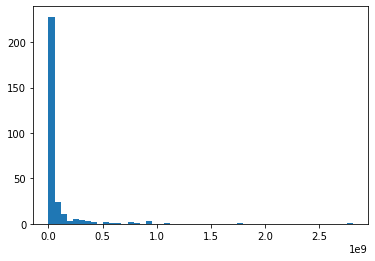

In [14]:
plt.hist(train.ctax1, bins=50)
plt.show()

### 14. profit1 = 당기순이익, 2017(회계년도)년 데이터를 의미함

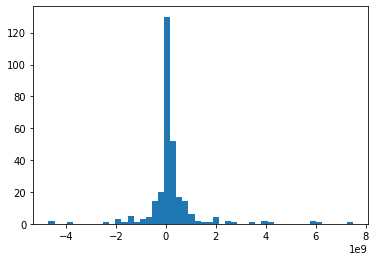

In [15]:
plt.hist(train.profit1, bins=50)
plt.show()

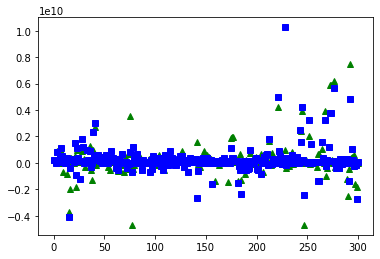

In [15]:
plt.plot(train['profit1'], 'g^', train['profit2'], 'bs')
plt.show()

# ||| 2017이 null이면 2016값 가져오기 <-> 2016이 null이면 2017값 가져오기 |||